<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Roof" data-toc-modified-id="Roof-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Roof</a></span></li><li><span><a href="#Exterior" data-toc-modified-id="Exterior-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exterior</a></span></li><li><span><a href="#Convert-quality/condition-categorical-columns-to-numeric" data-toc-modified-id="Convert-quality/condition-categorical-columns-to-numeric-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convert quality/condition categorical columns to numeric</a></span></li><li><span><a href="#Foundation" data-toc-modified-id="Foundation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Foundation</a></span></li><li><span><a href="#Basement" data-toc-modified-id="Basement-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Basement</a></span><ul class="toc-item"><li><span><a href="#Condition/quality" data-toc-modified-id="Condition/quality-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Condition/quality</a></span></li><li><span><a href="#Exposure" data-toc-modified-id="Exposure-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Exposure</a></span></li><li><span><a href="#Finish-and-area" data-toc-modified-id="Finish-and-area-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Finish and area</a></span></li></ul></li><li><span><a href="#Utilities,-heating,-air-and-electrical" data-toc-modified-id="Utilities,-heating,-air-and-electrical-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Utilities, heating, air and electrical</a></span></li><li><span><a href="#Garage" data-toc-modified-id="Garage-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Garage</a></span></li><li><span><a href="#Other-outdoor" data-toc-modified-id="Other-outdoor-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Other outdoor</a></span><ul class="toc-item"><li><span><a href="#Porch-area" data-toc-modified-id="Porch-area-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Porch area</a></span></li><li><span><a href="#Fence" data-toc-modified-id="Fence-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Fence</a></span></li><li><span><a href="#Misc." data-toc-modified-id="Misc.-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Misc.</a></span></li></ul></li><li><span><a href="#Interior" data-toc-modified-id="Interior-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Interior</a></span><ul class="toc-item"><li><span><a href="#Interior-room-counts" data-toc-modified-id="Interior-room-counts-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Interior room counts</a></span></li><li><span><a href="#House-area" data-toc-modified-id="House-area-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>House area</a></span></li></ul></li></ul></div>

# Project 2: Housing

You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt

- Explore the dataset, clean data, add features (if you can think of any)
- Identify features that can predict sale price of a house
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Build a model. What are the best predictors of price?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def dummy_and_drop(df, colname):
    
    min_value = df[colname].value_counts().idxmin()
    
    dummy_df = pd.get_dummies(df[colname], prefix=colname)
    dummy_df = dummy_df.drop(colname+"_"+str(min_value), axis=1)
    
    return dummy_df

# Load data

The data in `housing.csv` was cleaned and saved as `housing.initial.csv`. After some initial EDA, `housing.initial.csv` was saved as `housing.2.csv` 

In [3]:
# Load housing data

housing = pd.read_csv('../../data/housing.2.csv')

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SalePrice,MSSubClass_fix,LotFrontage_Imp,SalePrice_log,YrMoSold,FunctionalNum,LotArea_log,BuiltRemodDiff,LandSlopeNum,Street_Pave
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,208500,60,65.0,12.247694,2008-02-01,5,9.041922,0,1,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,181500,20,80.0,12.109011,2007-05-01,5,9.169518,0,1,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,223500,60,68.0,12.317167,2008-09-01,5,9.328123,1,1,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,140000,70,60.0,11.849398,2006-02-01,5,9.164296,55,1,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,250000,60,84.0,12.429216,2008-12-01,5,9.565214,0,1,1


In [4]:
print('Data has {} houses with {} features'.format(housing.shape[0], housing.shape[1]))

Data has 1460 houses with 90 features


In [5]:
# Initialize list variable to store dummy col dfs

dummied_features = []
dummied_col_num = 0

# Data Wrangling

## Roof

In [6]:
# Get % of roof types in data

housing.groupby(['RoofStyle', 'RoofMatl']).size() / housing.shape[0] * 100

RoofStyle  RoofMatl
Flat       CompShg      0.068493
           Membran      0.068493
           Metal        0.068493
           Tar&Grv      0.684932
Gable      CompShg     77.671233
           Roll         0.068493
           Tar&Grv      0.068493
           WdShngl      0.342466
Gambrel    CompShg      0.753425
Hip        ClyTile      0.068493
           CompShg     19.315068
           WdShake      0.136986
           WdShngl      0.068493
Mansard    CompShg      0.342466
           WdShake      0.136986
Shed       CompShg      0.068493
           WdShake      0.068493
dtype: float64

In [7]:
print("{} combinations of roof types in data".format(len(housing.groupby(['RoofStyle', 'RoofMatl']).size())))

17 combinations of roof types in data


More than 3/4 of houses have gable-type roofs with standard shingles. 1/5 have hip roofs with standard shingles. 

In [8]:
housing['RoofStyle'].value_counts(normalize=True) * 100

Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64

`Flat`, `Gambrel`, `Mansard` and `Shed` are less than 1% of the data. We could condense this category by group all these values into `Other`.

In [9]:
other_styles = ['Flat', 'Gambrel', 'Mansard', 'Shed']

housing['RoofStyleCat'] = housing['RoofStyle'].apply(lambda x: 'Other' if x in other_styles else x)
housing['RoofStyleCat'].value_counts(normalize=True)  * 100

Gable    78.150685
Hip      19.589041
Other     2.260274
Name: RoofStyleCat, dtype: float64

In [10]:
# Dummy all RoofStyle

roofstyle_dummies = dummy_and_drop(housing, 'RoofStyle')
dummied_features.append(roofstyle_dummies)
dummied_col_num += roofstyle_dummies.shape[1]

roofstyle_dummies.head()

,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [11]:
# Dummy all RoofStyleCat

roofstylecat_dummies = dummy_and_drop(housing, 'RoofStyleCat')
dummied_features.append(roofstylecat_dummies)
dummied_col_num += roofstylecat_dummies.shape[1]

roofstylecat_dummies.head()

,RoofStyleCat_Gable,RoofStyleCat_Hip
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [12]:
housing['RoofMatl'].value_counts(normalize=True) * 100

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Metal       0.068493
ClyTile     0.068493
Roll        0.068493
Membran     0.068493
Name: RoofMatl, dtype: float64

More than 98% of `RoofMatl` is `CompShg` and all other materials are less than 1% of the data. It may be worth engineering a feature where roof material is either `CompShg` or other.

In [13]:
housing['RoofMatl_CompShgBin'] = housing['RoofMatl'].apply(lambda x: 1 if x == 'CompShg' else 0)

In [14]:
# Dummy all RoofMatl

roofmatl_dummies = dummy_and_drop(housing, 'RoofMatl')
dummied_features.append(roofmatl_dummies)
dummied_col_num += roofmatl_dummies.shape[1]

roofmatl_dummies.head()

,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [15]:
dummied_col_num 

14

## Exterior

In [16]:
# How many house exteriors are of a single material?

print("{} house exteriors are of 1 material".format(len(housing[housing['Exterior1st'] == housing['Exterior2nd']])))
print("{} house exteriors are of 2 materials".format(len(housing[housing['Exterior1st'] != housing['Exterior2nd']])))

1323 house exteriors are of 1 material
137 house exteriors are of 2 materials


In [17]:
# Add column counting number of exterior materials

housing['ExtMatlNum'] = housing.apply(lambda x: 2 if x['Exterior1st'] != x['Exterior2nd'] else 1, axis=1)

In [18]:
housing['ExtMatlNum'].value_counts()

1    1323
2     137
Name: ExtMatlNum, dtype: int64

In [19]:
# Get unique values in both Exterior1st and Exterior2nd

exterior_mats = set(housing['Exterior1st'].unique().tolist() + housing['Exterior2nd'].unique().tolist())
exterior_mats

{'AsbShng',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Other',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing'}

In [20]:
ext_df = pd.DataFrame()

for mat in exterior_mats:
    
    ext_df['Exterior' + mat.replace(" ", "")] = housing.apply(lambda x: 1 if (x['Exterior1st'] == mat) or (x['Exterior2nd'] == mat) else 0, axis=1)

In [21]:
# Get % of houses with exterior material

ext_df.sum() / housing.shape[0] * 100

ExteriorVinylSd    35.410959
ExteriorWdShing     3.219178
ExteriorAsbShng     1.575342
ExteriorOther       0.068493
ExteriorAsphShn     0.205479
ExteriorWdSdng     15.479452
ExteriorStucco      2.123288
ExteriorBrkFace     3.493151
ExteriorHdBoard    16.164384
ExteriorImStucc     0.684932
ExteriorCemntBd     4.246575
ExteriorBrkComm     0.479452
ExteriorMetalSd    15.205479
ExteriorPlywood    10.547945
ExteriorStone       0.410959
ExteriorCBlock      0.068493
dtype: float64

In [22]:
# Bin materials < 1% of data into ExteriorLT1

ext_df['ExteriorOtherLT1'] = ext_df.apply(lambda x: 1 if (x['ExteriorOther'] == 1) or
                                            (x['ExteriorCBlock'] == 1) or
                                            (x['ExteriorImStucc'] == 1) or
                                            (x['ExteriorAsphShn'] == 1) or
                                            (x['ExteriorStone'] == 1) or
                                            (x['ExteriorBrkComm'] == 1) else 0, axis=1)
ext_df['ExteriorOtherLT1'].sum()

28

In [23]:
dummied_features.append(ext_df)
dummied_col_num += ext_df.shape[1]

ext_df.head()

,ExteriorVinylSd,ExteriorWdShing,ExteriorAsbShng,ExteriorOther,ExteriorAsphShn,ExteriorWdSdng,ExteriorStucco,ExteriorBrkFace,ExteriorHdBoard,ExteriorImStucc,ExteriorCemntBd,ExteriorBrkComm,ExteriorMetalSd,ExteriorPlywood,ExteriorStone,ExteriorCBlock,ExteriorOtherLT1
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
dummied_col_num

31

In [25]:
# Get masonry veneer values

housing['MasVnrType'].value_counts(dropna=False, normalize=True) * 100

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [26]:
# Dummy masonry veneer types

masvnr_dummies = dummy_and_drop(housing, 'MasVnrType')
dummied_features.append(masvnr_dummies)
dummied_col_num += masvnr_dummies.shape[1]

masvnr_dummies.head()

,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


591 have no masonry veneer


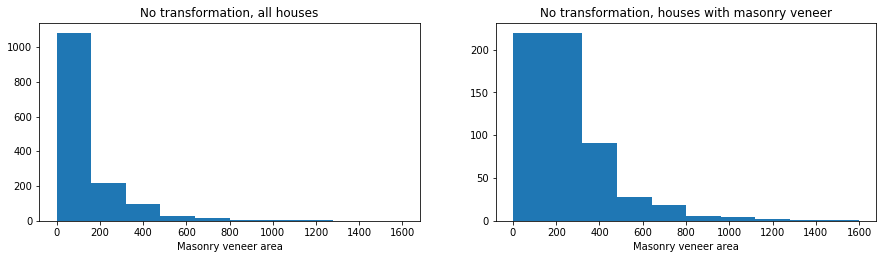

In [27]:
# Visualise distribution of masonr veneer area

print("{} have no masonry veneer".format(len(housing[housing['MasVnrArea'] > 0])))

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(221)
ax1.hist(housing['MasVnrArea'])
ax1.set_title("No transformation, all houses")
ax1.set_xlabel("Masonry veneer area")

ax1 = fig.add_subplot(222)
ax1.hist(housing[housing['MasVnrArea'] > 0]['MasVnrArea'])
ax1.set_title("No transformation, houses with masonry veneer")
ax1.set_xlabel("Masonry veneer area")

plt.show()

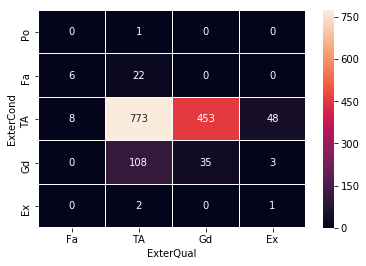

In [28]:
# visualise heatmap of crosstab exterior quality and condition

housing['ExterCond'] = pd.Categorical(housing['ExterCond'], 
                                      categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                      ordered=True)

housing['ExterQual'] = pd.Categorical(housing['ExterQual'], 
                                      categories=['Fa', 'TA', 'Gd', 'Ex'],
                                      ordered=True)

sns.heatmap(pd.crosstab(housing['ExterCond'], housing['ExterQual']), annot=True, fmt='d', linewidth=0.1)
plt.show()

## Convert quality/condition categorical columns to numeric

In [29]:
def convert_qual_to_number(x):
    
    if x == 'Po':
        return 1
    elif x == 'Fa':
        return 2
    elif x == 'TA':
        return 3
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5
    elif np.isnan(x):
        return 0
    else:
        return np.nan

In [30]:
cond_qual_cols = ['ExterCond', 'ExterQual', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                  'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for col in cond_qual_cols:
    housing[col+'Num'] = housing[col].apply(convert_qual_to_number)

In [31]:
housing[housing.columns[-len(cond_qual_cols):]].head()

,ExterCondNum,ExterQualNum,BsmtQualNum,BsmtCondNum,HeatingQCNum,KitchenQualNum,FireplaceQuNum,GarageQualNum,GarageCondNum
0,3,4,4,3,5,4,0,3,3
1,3,3,4,3,5,3,3,3,3
2,3,4,4,3,5,4,3,3,3
3,3,3,3,4,4,4,4,3,3
4,3,4,4,3,5,4,3,3,3


## Foundation

In [32]:
housing['Foundation'].value_counts(dropna=False, normalize=True) * 100

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64

In [33]:
# Bin slab, stone and wood into other

housing['FoundationCat'] = housing['Foundation'].apply(lambda x: 'Other' if x in ['Slab', 'Stone', 'Wood'] else x)

housing['FoundationCat'].value_counts(dropna=False, normalize=True) * 100

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Other      2.260274
Name: FoundationCat, dtype: float64

In [34]:
# Dummy Foundation and FoundationCat

foundation_dummies = dummy_and_drop(housing, 'Foundation')
foundationcat_dummies = dummy_and_drop(housing, 'FoundationCat')

dummied_col_num += foundation_dummies.shape[1]
dummied_col_num += foundationcat_dummies.shape[1]
dummied_features.append(foundation_dummies)
dummied_features.append(foundationcat_dummies)

foundation_dummies.head()

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [35]:
dummied_col_num

42

## Basement

### Condition/quality

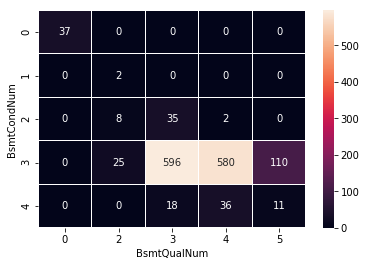

In [36]:
sns.heatmap(pd.crosstab(housing['BsmtCondNum'], housing['BsmtQualNum']), annot=True, fmt='d', linewidth=0.1)
plt.show()

### Exposure

In [37]:
# Find BsmtExposure value counts

housing['BsmtExposure'].value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [38]:
# Convert BsmtExposure column from categorical to ordinal and compare counts to BsmtExposure counts

def convert_exposure(x):
    
    if x == 'No':
        return 1
    elif x == 'Mn':
        return 2
    elif x == 'Av':
        return 3
    elif x == 'Gd':
        return 4
    elif np.isnan(x):
        return 0
    else:
        return np.nan
    
housing['BsmtExposureNum'] = housing['BsmtExposure'].apply(convert_exposure)

housing['BsmtExposureNum'].value_counts()

1    953
3    221
4    134
2    114
0     38
Name: BsmtExposureNum, dtype: int64

### Finish and area

In [39]:
# Do basement SF totals of all houses in data add up correctly?

(housing['BsmtFinSF1'] + housing['BsmtFinSF2'] +  housing['BsmtUnfSF'] == housing['TotalBsmtSF']).sum() == housing.shape[0]

True

In [40]:
housing['BsmtFinType1'].value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [41]:
housing['BsmtFinType2'].value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

There is 1 more NaN in `BsmtFinType2` than in `BsmtFinType1`. These values should be the same if the house has no basement.

In [42]:
basement_area_cols = ['BsmtFinType1', 'BsmtFinSF1', 
                      'BsmtFinType2', 'BsmtFinSF2',
                      'BsmtUnfSF', 'TotalBsmtSF']

In [43]:
# If types are NaN, total basement area should be 0

housing[(housing['BsmtFinType1'].isnull()) & 
        (housing['BsmtFinType2'].isnull())]['TotalBsmtSF'].sum()

0

In [44]:
housing[(~housing['BsmtFinType1'].isnull()) & 
        (housing['BsmtFinType2'].isnull())][basement_area_cols + ['BsmtQual', 'BsmtCond']]

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtQual,BsmtCond
332,GLQ,1124,NaN,479,1603,3206,Gd,TA


`BsmtFinType2` is `NaN` for house in row 332. As `BsmtCond` and `BsmtQual` indicate that this basement is in average to good condition and quality, we could replace this value with `ALQ`

In [45]:
housing.loc[332, 'BsmtFinType2'] = 'ALQ'

Basements with the same value for `BsmtFinType1` and `BsmtFinType2` should be unifinished basements.

In [46]:
# For basements with 1 type of finish, what type are they?

housing[housing['BsmtFinType1'] == housing['BsmtFinType2']]['BsmtFinType1'].value_counts(dropna=False)

Unf    430
BLQ      1
Name: BsmtFinType1, dtype: int64

In [47]:
# Do these basements have values for FinSF1 and FinSF2?

display("Finished area 1")
display(housing[housing['BsmtFinType1'] == housing['BsmtFinType2']]['BsmtFinSF1'].value_counts(dropna=False))

display("Finished area 2")
display(housing[housing['BsmtFinType1'] == housing['BsmtFinType2']]['BsmtFinSF2'].value_counts(dropna=False))

'Finished area 1'

0      430
543      1
Name: BsmtFinSF1, dtype: int64

'Finished area 2'

0      430
119      1
Name: BsmtFinSF2, dtype: int64

In [48]:
housing[(housing['BsmtFinType1'] == 'BLQ') &
        (housing['BsmtFinType2'] == 'BLQ')][basement_area_cols]

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
680,BLQ,543,BLQ,119,261,923


Basement finish and area values for house in row 680 do not make sense (Types should be different if not Unf) and could be in error. 

- Add BsmtFinSF1 and 2 together for new value BsmtFinSF1
- Change BsmtFinType2 to Unf
- Change BsmtFinSF2 to 0

In [49]:
housing.loc[680, 'BsmtFinSF1'] = 543 + 119
housing.loc[680, 'BsmtFinType2'] = 'Unf'
housing.loc[680, 'BsmtFinSF2'] = 0

# Check values have been changed

housing.loc[680, ['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 
                                             'BsmtUnfSF', 'TotalBsmtSF']]

BsmtFinType1    BLQ
BsmtFinSF1      662
BsmtFinType2    Unf
BsmtFinSF2        0
BsmtUnfSF       261
TotalBsmtSF     923
Name: 680, dtype: object

In [50]:
def count_basement_finish_counts(x):
    
    if (x['BsmtFinType1'] == 'No Basement') or (x['BsmtFinType2'] == 'No Basement'):
        return 0
    elif x['BsmtFinType1'] == x['BsmtFinType2']:
        return 1
    elif ['BsmtFinType1'] != x['BsmtFinType2']:
        return 2
    else:
        return np.nan

In [51]:
housing_v2 = housing.fillna({'BsmtFinType1': 'No Basement',
                             'BsmtFinType2': 'No Basement'}, axis=0) 

In [52]:
housing_v2['BsmtFinTypeNum'] = housing_v2.apply(count_basement_finish_counts, axis=1)

housing_v2['BsmtFinTypeNum'].value_counts()

2    993
1    430
0     37
Name: BsmtFinTypeNum, dtype: int64

In [53]:
# Get basement finish values that are not NaN or Unf

basement_fin = set(housing['BsmtFinType1'].unique().tolist() + housing['BsmtFinType2'].unique().tolist())
basement_fin.remove(np.nan)
basement_fin.remove('Unf')
basement_fin

{'ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec'}

In [54]:
for fin in basement_fin:
    
    housing_v2['Bsmt'+fin] = housing_v2.apply(lambda x: 1 if (x['BsmtFinType1'] == fin) or (x['BsmtFinType2'] == fin) else 0, axis=1)
    
# Add BsmtUnf column: 1 if there is any area of unfinished basement

housing_v2['BsmtUnf'] = housing_v2['BsmtUnfSF'].apply(lambda x: 1 if x > 0 else 0) 

In [55]:
housing_v2[housing_v2.columns[-len(basement_fin) - 1:]].head()

,BsmtLwQ,BsmtBLQ,BsmtRec,BsmtGLQ,BsmtALQ,BsmtUnf
0,0,0,0,1,0,1
1,0,0,0,0,1,1
2,0,0,0,1,0,1
3,0,0,0,0,1,1
4,0,0,0,1,0,1


In [56]:
# Check column values for houses with no basement (sum of sum of no basement house rows should be 0)

housing_v2[housing['BsmtFinType1'].isnull()][housing_v2.columns[-len(basement_fin) - 1:]].sum(axis=1).sum()

0

In [57]:
housing_v2[basement_area_cols].head()

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,GLQ,706,Unf,0,150,856
1,ALQ,978,Unf,0,284,1262
2,GLQ,486,Unf,0,434,920
3,ALQ,216,Unf,0,540,756
4,GLQ,655,Unf,0,490,1145


In [58]:
# ratio finished and unfinished basement area

def create_finished_area_ratio(x):
    
    if x['TotalBsmtSF'] == 0:
        return 0
    else:
        return (x['BsmtFinSF1'] + x['BsmtFinSF2']) / x['TotalBsmtSF']
    
def create_unfinished_area_ratio(x):
    
    if x['TotalBsmtSF'] == 0:
        return 0
    else:
        return x['BsmtUnfSF'] / x['TotalBsmtSF']


housing_v2['BsmtFinRatio'] = housing_v2.apply(create_finished_area_ratio, axis=1)

housing_v2['BsmtUnfRatio'] = housing_v2.apply(create_unfinished_area_ratio, axis=1)

In [59]:
housing_v2[basement_area_cols + ['BsmtFinRatio', 'BsmtUnfRatio']].head(10)

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFinRatio,BsmtUnfRatio
0,GLQ,706,Unf,0,150,856,0.824766,0.175234
1,ALQ,978,Unf,0,284,1262,0.774960,0.225040
2,GLQ,486,Unf,0,434,920,0.528261,0.471739
3,ALQ,216,Unf,0,540,756,0.285714,0.714286
4,GLQ,655,Unf,0,490,1145,0.572052,0.427948
5,GLQ,732,Unf,0,64,796,0.919598,0.080402
6,GLQ,1369,Unf,0,317,1686,0.811981,0.188019
7,ALQ,859,BLQ,32,216,1107,0.804878,0.195122
8,Unf,0,Unf,0,952,952,0.000000,1.000000
9,GLQ,851,Unf,0,140,991,0.858729,0.141271


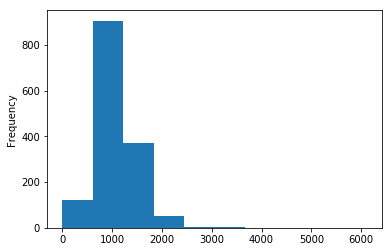

In [114]:
housing_v2['TotalBsmtSF'].plot.hist()
plt.show()

## Utilities, heating, air and electrical

In [60]:
housing_v2['Utilities'].value_counts(dropna=False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [61]:
# Dummy AllPub value only

housing_v2['Utilities_AllPub'] = housing_v2['Utilities'].apply(lambda x:1 if x == 'AllPub' else 0)

housing_v2[['Utilities', 'Utilities_AllPub']].head()

,Utilities,Utilities_AllPub
0,AllPub,1
1,AllPub,1
2,AllPub,1
3,AllPub,1
4,AllPub,1


In [62]:
housing_v2['Heating'].value_counts(dropna=False, normalize=True) * 100

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64

In [63]:
# Dummy all values

heating_dummies = dummy_and_drop(housing_v2, 'Heating')
dummied_features.append(heating_dummies)
dummied_col_num += heating_dummies.shape[1]

heating_dummies.head(15)

,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


In [64]:
dummied_col_num

47

In [65]:
# Bin heating types < 1% into other and dummy

housing_v2['HeatingCat'] = housing_v2['Heating'].apply(lambda x: 'Other' if x not in ['GasW', 'GasA'] else x)
heating_cat_dummies = dummy_and_drop(housing_v2, 'HeatingCat')
dummied_features.append(heating_cat_dummies)
dummied_col_num += heating_cat_dummies.shape[1]

heating_cat_dummies.head()

,HeatingCat_GasA,HeatingCat_GasW
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [66]:
# Count central air

housing_v2['CentralAir'].value_counts(dropna=False, normalize=True) * 100

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

In [67]:
# Convert central air to numeric

housing_v2['CentralAirNum'] = housing_v2['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

housing_v2['CentralAirNum'].value_counts(dropna=False, normalize=True) * 100

1    93.493151
0     6.506849
Name: CentralAirNum, dtype: float64

In [68]:
housing_v2['Electrical'].value_counts(dropna=False, normalize=True) * 100

SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

In [69]:
# Bin eletrical to sbrkr, fuse and mix

housing_v2['ElectricalCat'] = housing_v2['Electrical'].apply(lambda x: 'Fuse' if x in ['FuseA', 'FuseF', 'FuseP'] else x)

housing_v2['ElectricalCat'].value_counts(dropna=False, normalize=True) * 100

SBrkr    91.438356
Fuse      8.493151
Mix       0.068493
Name: ElectricalCat, dtype: float64

In [70]:
# Dummy electrical 

electrical_dummies = dummy_and_drop(housing_v2, 'Electrical')
dummied_features.append(electrical_dummies)
dummied_col_num += electrical_dummies.shape[1]

electricalcat_dummies = dummy_and_drop(housing_v2, 'ElectricalCat')
dummied_features.append(electricalcat_dummies)
dummied_col_num += electricalcat_dummies.shape[1]

pd.concat([electrical_dummies, electricalcat_dummies], axis=1).head(10)

,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,ElectricalCat_Fuse,ElectricalCat_SBrkr
0,0,0,0,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,0,1
3,0,0,0,1,0,1
4,0,0,0,1,0,1
5,0,0,0,1,0,1
6,0,0,0,1,0,1
7,0,0,0,1,0,1
8,0,1,0,0,1,0
9,0,0,0,1,0,1


In [71]:
dummied_col_num

55

## Garage

In [72]:
# Check garage types

housing_v2['GarageType'].value_counts(dropna=False, normalize=True) * 100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NaN         5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [73]:
# fill NaN with No

housing_v2['GarageType'] = housing_v2['GarageType'].fillna('No')

# dummy garage types

garage_type_dummies = dummy_and_drop(housing_v2, 'GarageType')
dummied_features.append(garage_type_dummies)
dummied_col_num += garage_type_dummies.shape[1]

garage_type_dummies.head()

,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0


In [74]:
dummied_col_num

61

In [75]:
# How many garages have missing year built values?

housing_v2['GarageYrBlt'].isnull().sum()

81

In [76]:
# Does this match the houses with no garages?

len(housing_v2[(housing_v2['GarageType'] == 'No')]) == housing_v2['GarageYrBlt'].isnull().sum()

True

In [77]:
# Check if there are houses that have year garage built < year house built

housing_v2[(housing_v2['GarageYrBlt'] < housing_v2['YearBuilt'])][['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
29,1920.0,1927
93,1900.0,1910
324,1961.0,1967
600,2003.0,2005
736,1949.0,1950
1103,1954.0,1959
1376,1925.0,1930
1414,1922.0,1923
1418,1962.0,1963


In [78]:
# Fill NaNs in GarageYrBlt with 0

housing_v2['GarageYrBlt'] = housing_v2['GarageYrBlt'].fillna(0).astype(int)

In [79]:
# Create difference between years house and garage built

housing_v2['GarageYrDiff'] = housing_v2['GarageYrBlt'] - housing_v2['YearBuilt']

housing_v2[['YearBuilt', 'GarageYrBlt','GarageYrDiff']].head()

,YearBuilt,GarageYrBlt,GarageYrDiff
0,2003,2003,0
1,1976,1976,0
2,2001,2001,0
3,1915,1998,83
4,2000,2000,0


In [80]:
housing_v2['GarageFinish'].value_counts(dropna=False, normalize=True) * 100

Unf    41.438356
RFn    28.904110
Fin    24.109589
NaN     5.547945
Name: GarageFinish, dtype: float64

In [81]:
# dummy finish

garage_fin_dummies = pd.get_dummies(housing_v2['GarageFinish'], prefix='GarageFinish')
dummied_features.append(garage_fin_dummies)
dummied_col_num += garage_fin_dummies.shape[1]

garage_fin_dummies.head()

,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [82]:
dummied_col_num

64

In [83]:
housing_v2['GarageCars'].value_counts(dropna=False, normalize=True) * 100

2    56.438356
1    25.273973
3    12.397260
0     5.547945
4     0.342466
Name: GarageCars, dtype: float64

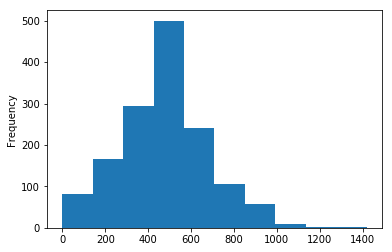

In [84]:
housing_v2['GarageArea'].plot.hist()
plt.show()

In [85]:
# Check that garage area of no garage is 0

housing_v2[housing_v2['GarageType'] == 'No']['GarageArea'].sum()

0

In [86]:
# Check driveway

housing_v2['PavedDrive'].value_counts(dropna=False, normalize=True) * 100

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64

In [87]:
# Check value of Paved drive if no garage

housing_v2[housing_v2['GarageType'] == 'No']['PavedDrive'].value_counts(dropna=False)

Y    47
N    32
P     2
Name: PavedDrive, dtype: int64

In [88]:
# Encode amount of pavement

def encode_pavement(x):
    
    if x == 'Y':
        return 1
    elif x == 'P':
        return 0.5
    else:
        return 0
    
housing_v2['PavedDriveNum'] = housing_v2['PavedDrive'].apply(encode_pavement)

housing_v2['PavedDriveNum'].value_counts(dropna=False, normalize=True) * 100

1.0    91.780822
0.0     6.164384
0.5     2.054795
Name: PavedDriveNum, dtype: float64

## Other outdoor

### Porch area

In [89]:
# Total sum of porch area

porch_sf = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

housing_v2[porch_sf].head()

housing_v2['TotalPorchSF'] = housing_v2[porch_sf].sum(axis=1)

housing_v2[porch_sf + ['TotalPorchSF']].head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalPorchSF
0,0,61,0,0,0,61
1,298,0,0,0,0,298
2,0,42,0,0,0,42
3,0,35,272,0,0,307
4,192,84,0,0,0,276


In [129]:
# Are there houses with no porch?

print("Min. value for porch area is {}".format(housing_v2['TotalPorchSF'].min()))

Min. value for porch area is 0


In [90]:
# Count total numer of porch types

housing_v2['TotalPorchTypeNum'] = housing_v2[porch_sf].astype(bool).sum(axis=1)

housing_v2['TotalPorchTypeNum'].head()

0    1
1    1
2    1
3    2
4    2
Name: TotalPorchTypeNum, dtype: int64

In [91]:
# Check that houses with no pool have pool area of 0

housing_v2[housing_v2['PoolQC'].isnull()]['PoolArea'].sum()

0

In [92]:
# Check pool QC

housing_v2['PoolQC'].value_counts(dropna=False, normalize=True)*100

NaN    99.520548
Gd      0.205479
Ex      0.136986
Fa      0.136986
Name: PoolQC, dtype: float64

In [93]:
# Encode PoolQC

def encode_poolqc(x):
    
    if x == 'Fa':
        return 1
    elif x == 'TA':
        return 2
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4
    else:
        return 0
    
housing_v2['PoolQCNum'] = housing_v2['PoolQC'].apply(encode_poolqc)

housing_v2['PoolQCNum'].value_counts(dropna=False, normalize=True)*100

0    99.520548
3     0.205479
4     0.136986
1     0.136986
Name: PoolQCNum, dtype: float64

### Fence

In [94]:
housing_v2['Fence'].value_counts(dropna=False, normalize=True)*100

NaN      80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64

In [95]:
# Fill NaN with None

housing_v2['Fence'] = housing_v2['Fence'].fillna('None')

# Dummy Fence values

fence_dummies = dummy_and_drop(housing_v2, 'Fence')
dummied_features.append(fence_dummies)
dummied_col_num += fence_dummies.shape[1]

fence_dummies.head()

,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_None
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [96]:
dummied_col_num

68

### Misc.

In [97]:
housing_v2['MiscFeature'].value_counts(dropna=False, normalize=True)*100

NaN     96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64

In [98]:
# Does MiscVal == 0 if MiscFeature is NaN?

housing_v2[housing_v2['MiscFeature'].isnull()]['MiscVal'].sum()

0

In [99]:
# DUmmy MiscFeature

misc_dummies = pd.get_dummies(housing_v2['MiscFeature'], prefix='MiscFeature')
dummied_col_num += misc_dummies.shape[1]
dummied_features.append(misc_dummies)

misc_dummies.head()

,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


## Interior

### Interior room counts

In [100]:
## Count bathrooms

for col in ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']:
    
    print(col)
    print(housing_v2[col].value_counts(dropna=False, normalize=True)*100)
    print('\n')

BsmtFullBath
0    58.630137
1    40.273973
2     1.027397
3     0.068493
Name: BsmtFullBath, dtype: float64


BsmtHalfBath
0    94.383562
1     5.479452
2     0.136986
Name: BsmtHalfBath, dtype: float64


FullBath
2    52.602740
1    44.520548
3     2.260274
0     0.616438
Name: FullBath, dtype: float64


HalfBath
0    62.534247
1    36.643836
2     0.821918
Name: HalfBath, dtype: float64




In [101]:
housing_v2['BedroomAbvGr'].value_counts(dropna=False, normalize=True)*100

3    55.068493
2    24.520548
4    14.589041
1     3.424658
5     1.438356
6     0.479452
0     0.410959
8     0.068493
Name: BedroomAbvGr, dtype: float64

In [102]:
housing_v2['KitchenAbvGr'].value_counts(dropna=False, normalize=True)*100

1    95.342466
2     4.452055
3     0.136986
0     0.068493
Name: KitchenAbvGr, dtype: float64

In [103]:
housing_v2['TotRmsAbvGrd'].value_counts(dropna=False, normalize=True)*100

6     27.534247
7     22.534247
5     18.835616
8     12.808219
4      6.643836
9      5.136986
10     3.219178
11     1.232877
3      1.164384
12     0.753425
14     0.068493
2      0.068493
Name: TotRmsAbvGrd, dtype: float64

In [104]:
## Do all houses have more rooms above grade than total bedrooms and botchens above grade?

(housing_v2[['BedroomAbvGr', 'KitchenAbvGr']].sum(axis=1) <= housing_v2['TotRmsAbvGrd']).sum() == housing_v2.shape[0]

True

### House area

In [105]:
house_sf = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']

# How many houses does 'LowQualFinSF' + 'GrLivArea' == '1stFlrSF' + '2ndFlrSF'?

(housing_v2[['LowQualFinSF', 'GrLivArea']].sum(axis=1) == housing_v2[['1stFlrSF', '2ndFlrSF']].sum(axis=1)).sum()

1434

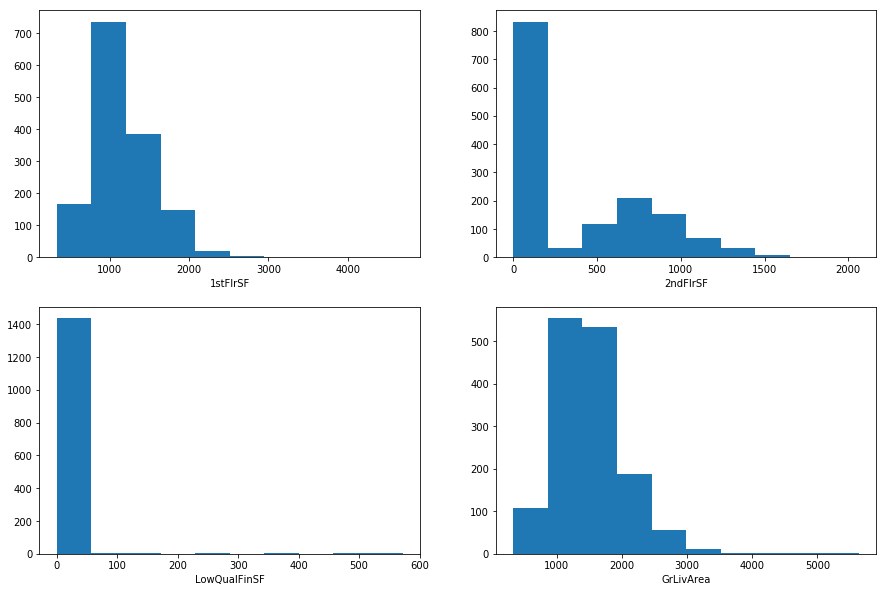

In [125]:
# View distribution of house floor area

fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(house_sf):
    
    ax = fig.add_subplot(2, 2, i+1)
    ax.hist(housing_v2[col])
    ax.set_xlabel(col)
    
plt.show() 

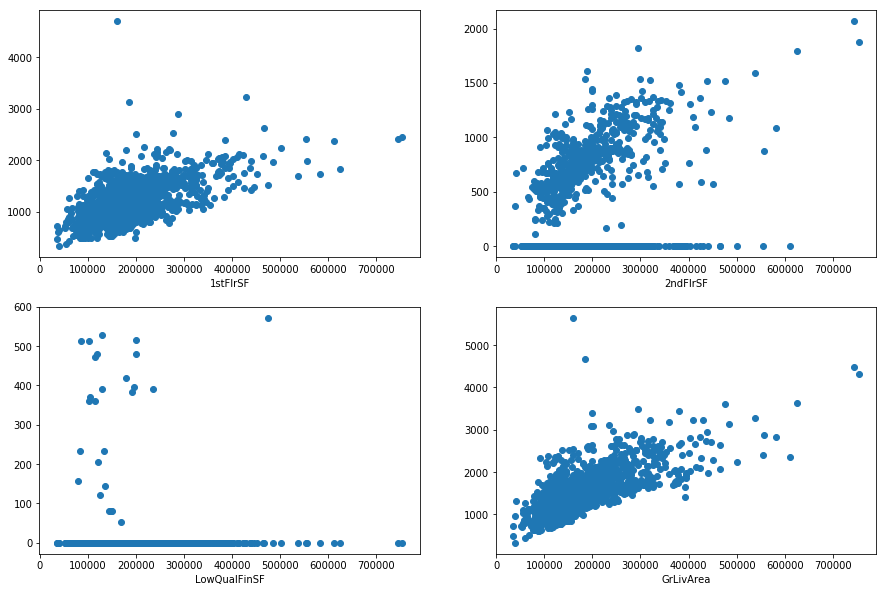

In [136]:
# Log transformation of house floor area vs. sale price

fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(house_sf):
    
    ax = fig.add_subplot(2, 2, i+1)
    ax.scatter(housing_v2['SalePrice'], 
               housing_v2[col])
    ax.set_xlabel(col)
    
plt.show() 

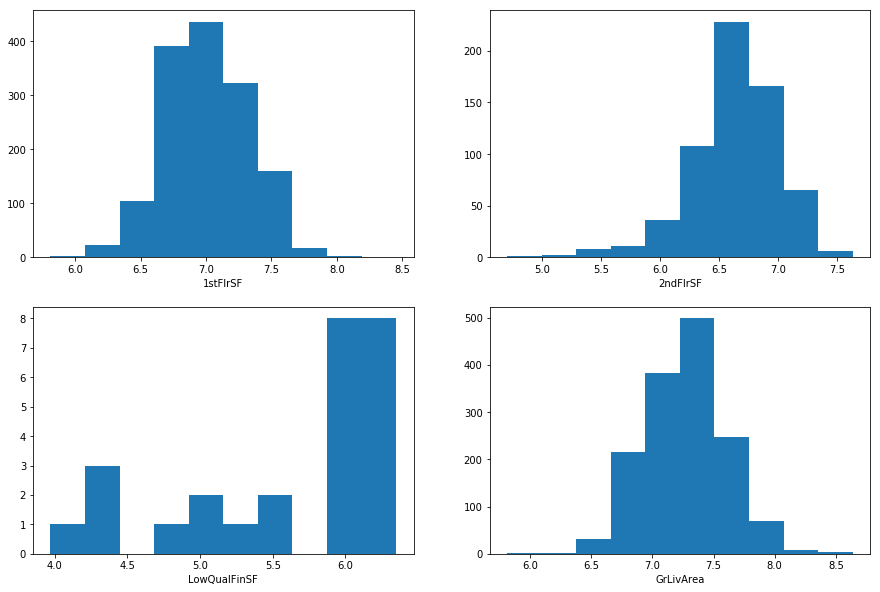

In [123]:
# Log transformation of house floor area

fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(house_sf):
    
    ax = fig.add_subplot(2, 2, i+1)
    ax.hist(np.log(housing_v2[housing_v2[col] != 0][col]))
    ax.set_xlabel(col)
    
plt.show()    

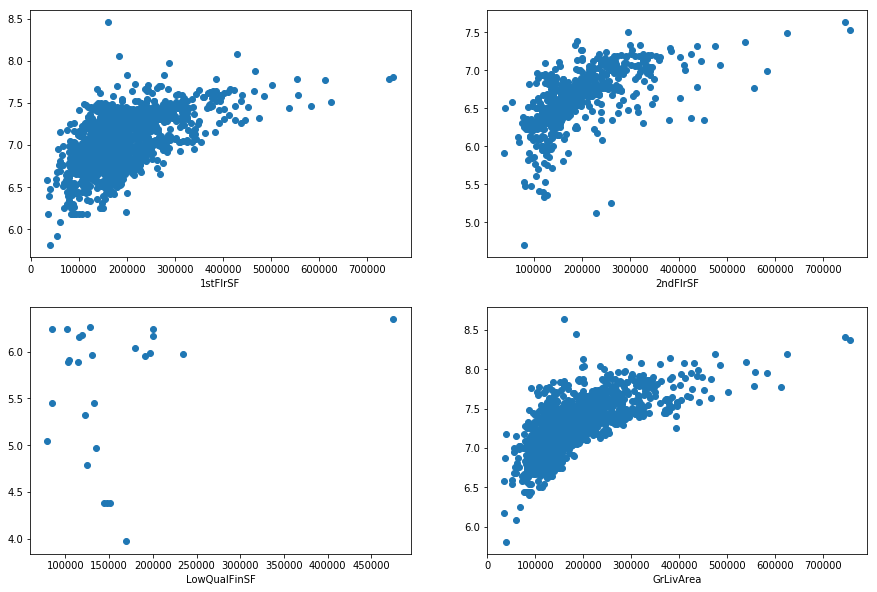

In [134]:
# Log transformation of house floor area vs. sale price

fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(house_sf):
    
    ax = fig.add_subplot(2, 2, i+1)
    ax.scatter(housing_v2[housing_v2[col] != 0]['SalePrice'], 
               np.log(housing_v2[housing_v2[col] != 0][col]))
    ax.set_xlabel(col)
    
plt.show() 

In [127]:
# Add columns for log of 1stFirSF anf GrLivArea

housing_v2['1stFlrSF_log'] = np.log(housing_v2['1stFlrSF'])
housing_v2['GrLivArea_log'] = np.log(housing_v2['GrLivArea'])

In [107]:
housing_v2[(housing_v2[['LowQualFinSF', 'GrLivArea']].sum(axis=1) != housing_v2[['1stFlrSF', '2ndFlrSF']].sum(axis=1))][house_sf]

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
51,816,0,360,1176
88,1013,0,513,1526
125,520,0,234,754
170,854,0,528,1382
185,1518,1518,572,3608
187,808,704,144,1656
197,1360,1360,392,3112
198,929,929,371,2229
263,926,0,390,1316
267,1052,720,420,2192


# Concatenate dummies to main df

In [130]:
dummies_df = pd.concat(dummied_features, axis=1)

dummies_df.shape[1] == dummied_col_num

True

In [131]:
dummies_df.columns

Index(['RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyleCat_Gable',
       'RoofStyleCat_Hip', 'RoofMatl_ClyTile', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'ExteriorVinylSd',
       'ExteriorWdShing', 'ExteriorAsbShng', 'ExteriorOther',
       'ExteriorAsphShn', 'ExteriorWdSdng', 'ExteriorStucco',
       'ExteriorBrkFace', 'ExteriorHdBoard', 'ExteriorImStucc',
       'ExteriorCemntBd', 'ExteriorBrkComm', 'ExteriorMetalSd',
       'ExteriorPlywood', 'ExteriorStone', 'ExteriorCBlock',
       'ExteriorOtherLT1', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'FoundationCat_BrkTil', 'FoundationCat_CBlock', 'FoundationCat_PConc',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
      

In [132]:
housing_v3 = pd.concat([housing_v2, dummies_df], axis=1)

housing_v3.shape

(1460, 196)

In [133]:
# Save housing_v3

housing_v3.to_csv("../../data/housing.3.csv", index=False)